In [1]:
import pandas as pd
import numpy as np
import pickle
from references.helper_functions import clean_tweets_with_lem, findEmotion
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

In [2]:
findEmotionFunction = np.vectorize(findEmotion)
cleanTextFunction = np.vectorize(clean_tweets_with_lem)

In [3]:
data = pd.read_csv('2018-E-c-En-train.txt',  delimiter = "\t")

anger_df = data[data["anger"] == 1].reset_index(drop=True)
fear_df = data[data["fear"] == 1].reset_index(drop=True)
joy_df = data[data["joy"] == 1].reset_index(drop=True)
love_df = data[data["love"] == 1].reset_index(drop=True)
sadness_df = data[data["sadness"] == 1].reset_index(drop=True)
surprise_df = data[data['surprise'] == 1].reset_index(drop=True)

anger_df['emotion'] = 'anger'
fear_df['emotion'] = 'fear'
joy_df['emotion'] = 'joy'
love_df['emotion'] = 'love'
sadness_df['emotion'] = 'sadness'
surprise_df['emotion'] = 'surprise'

all_tweets = pd.concat([anger_df, fear_df, joy_df, love_df, sadness_df, surprise_df])

SGDC
For the anger labels out of the 2544 samples the model got 25.354% correct
For the fear labels out of the 1242 samples the model got 22.544% correct
For the joy labels out of the 2477 samples the model got 65.482% correct
For the love labels out of the 700 samples the model got 5.286% correct
For the sadness labels out of the 2008 samples the model got 33.317% correct
For the surprise labels out of the 361 samples the model got 6.094% correct


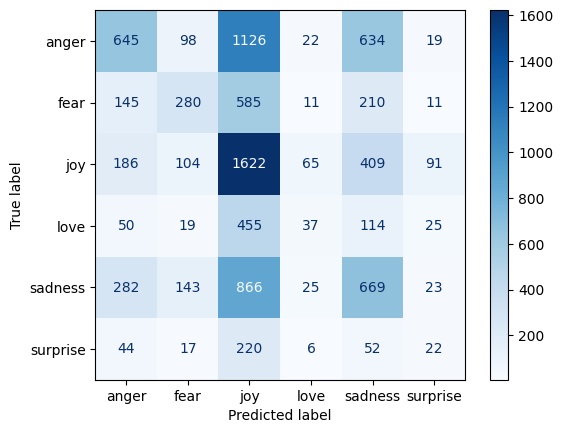

              precision    recall  f1-score   support

       anger       0.48      0.25      0.33      2544
        fear       0.42      0.23      0.29      1242
         joy       0.33      0.65      0.44      2477
        love       0.22      0.05      0.09       700
     sadness       0.32      0.33      0.33      2008
    surprise       0.12      0.06      0.08       361

    accuracy                           0.35      9332
   macro avg       0.32      0.26      0.26      9332
weighted avg       0.36      0.35      0.33      9332



In [4]:
model = pickle.load(open('references/models/cleaned_NLP_BoW_SGDC_model_92.pkl','rb'))
vectorizer = pickle.load(open('references/vectorizers/cleaned_NLP_BoW_SGDC_vectorizer_92.pkl','rb'))

anger_texts = anger_df["Tweet"].values
clean_anger_texts = cleanTextFunction(anger_texts)
anger_results = findEmotionFunction(clean_anger_texts, vectorizer, model)
anger_correct_score = sum(anger_results == 'anger') / len(anger_results)

fear_texts = fear_df["Tweet"].values
clean_fear_texts = cleanTextFunction(fear_texts)
fear_results = findEmotionFunction(clean_fear_texts, vectorizer, model)
fear_correct_score = sum(fear_results == 'fear') / len(fear_results)

joy_texts = joy_df["Tweet"].values
clean_joy_texts = cleanTextFunction(joy_texts)
joy_results = findEmotionFunction(clean_joy_texts, vectorizer, model)
joy_correct_score = sum(joy_results == 'joy') / len(joy_results)

love_texts = love_df["Tweet"].values
clean_love_texts = cleanTextFunction(love_texts)
love_results = findEmotionFunction(clean_love_texts, vectorizer, model)
love_correct_score = sum(love_results == 'love') / len(love_results)

sadness_texts = sadness_df["Tweet"].values
clean_sadness_texts = cleanTextFunction(sadness_texts)
sadness_results = findEmotionFunction(clean_sadness_texts, vectorizer, model)
sadness_correct_score = sum(sadness_results == 'sadness') / len(sadness_results)

surprise_texts = surprise_df["Tweet"].values
clean_surprise_texts = cleanTextFunction(surprise_texts)
surprise_results = findEmotionFunction(clean_surprise_texts, vectorizer, model)
surprise_correct_score = sum(surprise_results == 'surprise') / len(surprise_results)

print("SGDC")
print(f"For the anger labels out of the {len(anger_results)} samples the model got {round((anger_correct_score*100),3)}% correct")
print(f"For the fear labels out of the {len(fear_results)} samples the model got {round((fear_correct_score*100),3)}% correct")
print(f"For the joy labels out of the {len(joy_results)} samples the model got {round((joy_correct_score*100),3)}% correct")
print(f"For the love labels out of the {len(love_results)} samples the model got {round((love_correct_score*100),3)}% correct")
print(f"For the sadness labels out of the {len(sadness_results)} samples the model got {round((sadness_correct_score*100),3)}% correct")
print(f"For the surprise labels out of the {len(surprise_results)} samples the model got {round((surprise_correct_score*100),3)}% correct")

X = all_tweets['Tweet'].values
y = all_tweets['emotion'].values
X = cleanTextFunction(X)
prediction = findEmotionFunction(X, vectorizer, model)

cm = confusion_matrix(y, prediction, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()
print(classification_report(y, prediction, target_names=model.classes_, zero_division=1))

In [ ]:
model = pickle.load(open('references/models/cleaned_BoW_MNB_88.pkl','rb'))
vectorizer = pickle.load(open('references/vectorizers/BoW_vectorizer_MNB_88.pkl','rb'))

anger_texts = anger_df["Tweet"].values
clean_anger_texts = cleanTextFunction(anger_texts)
anger_results = findEmotionFunction(clean_anger_texts, vectorizer, model)
anger_correct_score = sum(anger_results == 'anger') / len(anger_results)

fear_texts = fear_df["Tweet"].values
clean_fear_texts = cleanTextFunction(fear_texts)
fear_results = findEmotionFunction(clean_fear_texts, vectorizer, model)
fear_correct_score = sum(fear_results == 'fear') / len(fear_results)

joy_texts = joy_df["Tweet"].values
clean_joy_texts = cleanTextFunction(joy_texts)
joy_results = findEmotionFunction(clean_joy_texts, vectorizer, model)
joy_correct_score = sum(joy_results == 'joy') / len(joy_results)

love_texts = love_df["Tweet"].values
clean_love_texts = cleanTextFunction(love_texts)
love_results = findEmotionFunction(clean_love_texts, vectorizer, model)
love_correct_score = sum(love_results == 'love') / len(love_results)

sadness_texts = sadness_df["Tweet"].values
clean_sadness_texts = cleanTextFunction(sadness_texts)
sadness_results = findEmotionFunction(clean_sadness_texts, vectorizer, model)
sadness_correct_score = sum(sadness_results == 'sadness') / len(sadness_results)

surprise_texts = surprise_df["Tweet"].values
clean_surprise_texts = cleanTextFunction(surprise_texts)
surprise_results = findEmotionFunction(clean_surprise_texts, vectorizer, model)
surprise_correct_score = sum(surprise_results == 'surprise') / len(surprise_results)

print("MNB")
print(f"For the anger labels out of the {len(anger_results)} samples the model got {round((anger_correct_score*100),3)}% correct")
print(f"For the fear labels out of the {len(fear_results)} samples the model got {round((fear_correct_score*100),3)}% correct")
print(f"For the joy labels out of the {len(joy_results)} samples the model got {round((joy_correct_score*100),3)}% correct")
print(f"For the love labels out of the {len(love_results)} samples the model got {round((love_correct_score*100),3)}% correct")
print(f"For the sadness labels out of the {len(sadness_results)} samples the model got {round((sadness_correct_score*100),3)}% correct")
print(f"For the surprise labels out of the {len(surprise_results)} samples the model got {round((surprise_correct_score*100),3)}% correct")

X = all_tweets['Tweet'].values
y = all_tweets['emotion'].values
X = cleanTextFunction(X)
prediction = findEmotionFunction(X, vectorizer, model)

cm = confusion_matrix(y, prediction, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()
print(classification_report(y, prediction, target_names=model.classes_, zero_division=1))

In [ ]:
anger_strick_df = data[
    (data["anger"] == 1) & 
    (data["anticipation"] == 0) &
    (data["disgust"] == 0) &
    (data["fear"] == 0) &
    (data["joy"] == 0) &
    (data["love"] == 0) &
    (data["optimism"] == 0) &
    (data["pessimism"] == 0) &
    (data["sadness"] == 0) &
    (data["surprise"] == 0) &
    (data["trust"] == 0) 
].reset_index(drop=True)

fear_strick_df = data[
    (data["anger"] == 0) & 
    (data["anticipation"] == 0) &
    (data["disgust"] == 0) &
    (data["fear"] == 1) &
    (data["joy"] == 0) &
    (data["love"] == 0) &
    (data["optimism"] == 0) &
    (data["pessimism"] == 0) &
    (data["sadness"] == 0) &
    (data["surprise"] == 0) &
    (data["trust"] == 0) 
].reset_index(drop=True)

joy_strick_df = data[
    (data["anger"] == 0) & 
    (data["anticipation"] == 0) &
    (data["disgust"] == 0) &
    (data["fear"] == 0) &
    (data["joy"] == 1) &
    (data["love"] == 0) &
    (data["optimism"] == 0) &
    (data["pessimism"] == 0) &
    (data["sadness"] == 0) &
    (data["surprise"] == 0) &
    (data["trust"] == 0) 
].reset_index(drop=True)

love_strick_df = data[
    (data["anger"] == 0) & 
    (data["anticipation"] == 0) &
    (data["disgust"] == 0) &
    (data["fear"] == 0) &
    (data["joy"] == 0) &
    (data["love"] == 1) &
    (data["optimism"] == 0) &
    (data["pessimism"] == 0) &
    (data["sadness"] == 0) &
    (data["surprise"] == 0) &
    (data["trust"] == 0) 
].reset_index(drop=True)

sadness_strick_df = data[
    (data["anger"] == 0) & 
    (data["anticipation"] == 0) &
    (data["disgust"] == 0) &
    (data["fear"] == 0) &
    (data["joy"] == 0) &
    (data["love"] == 0) &
    (data["optimism"] == 0) &
    (data["pessimism"] == 0) &
    (data["sadness"] == 1) &
    (data["surprise"] == 0) &
    (data["trust"] == 0) 
].reset_index(drop=True)

surprise_strick_df = data[
    (data["anger"] == 0) & 
    (data["anticipation"] == 0) &
    (data["disgust"] == 0) &
    (data["fear"] == 0) &
    (data["joy"] == 0) &
    (data["love"] == 0) &
    (data["optimism"] == 0) &
    (data["pessimism"] == 0) &
    (data["sadness"] == 0) &
    (data["surprise"] == 1) &
    (data["trust"] == 0) 
].reset_index(drop=True)

anger_strick_df['emotion'] = 'anger'
fear_strick_df['emotion'] = 'fear'
joy_strick_df['emotion'] = 'joy' 
love_strick_df['emotion'] = 'love' 
sadness_strick_df['emotion'] = 'sadness' 
surprise_strick_df['emotion'] = 'surprise'

all_tweets_strick = pd.concat([anger_strick_df, fear_strick_df, joy_strick_df, love_strick_df, sadness_strick_df, surprise_strick_df])

anger_texts = anger_strick_df['Tweet'].values
clean_anger_texts = cleanTextFunction(anger_texts)
anger_results = findEmotionFunction(clean_anger_texts, vectorizer, model)
anger_correct_score = sum(anger_results == 'anger') / len(anger_results)

fear_texts = fear_strick_df['Tweet'].values
clean_fear_texts = cleanTextFunction(fear_texts)
fear_results = findEmotionFunction(clean_fear_texts, vectorizer, model)
fear_correct_score = sum(fear_results == 'fear') / len(fear_results)

joy_texts = joy_strick_df['Tweet'].values
clean_joy_texts = cleanTextFunction(joy_texts)
joy_results = findEmotionFunction(clean_joy_texts, vectorizer, model)
joy_correct_score = sum(joy_results == 'joy') / len(joy_results)

love_texts = love_strick_df['Tweet'].values
clean_love_texts = cleanTextFunction(love_texts)
love_results = findEmotionFunction(clean_love_texts, vectorizer, model)
love_correct_score = sum(love_results == 'love') / len(love_results)

sadness_texts = sadness_strick_df['Tweet'].values
clean_sadness_texts = cleanTextFunction(sadness_texts)
sadness_results = findEmotionFunction(clean_sadness_texts, vectorizer, model)
sadness_correct_score = sum(sadness_results == 'sadness') / len(sadness_results)

surprise_texts = surprise_strick_df['Tweet'].values
clean_surprise_texts = cleanTextFunction(surprise_texts)
surprise_results = findEmotionFunction(clean_surprise_texts, vectorizer, model)
surprise_correct_score = sum(surprise_results == 'surprise') / len(surprise_results)

print("MNB Strick")
print(f"For the anger labels out of the {len(anger_results)} samples the model got {round((anger_correct_score*100),3)}% correct")
print(f"For the fear labels out of the {len(fear_results)} samples the model got {round((fear_correct_score*100),3)}% correct")
print(f"For the joy labels out of the {len(joy_results)} samples the model got {round((joy_correct_score*100),3)}% correct")
print(f"For the love labels out of the {len(love_results)} samples the model got {round((love_correct_score*100),3)}% correct")
print(f"For the sadness labels out of the {len(sadness_results)} samples the model got {round((sadness_correct_score*100),3)}% correct")
print(f"For the surprise labels out of the {len(surprise_results)} samples the model got {round((surprise_correct_score*100),3)}% correct")

X = all_tweets_strick['Tweet'].values
y = all_tweets_strick['emotion'].values
X = cleanTextFunction(X)
prediction = findEmotionFunction(X, vectorizer, model)

cm = confusion_matrix(y, prediction, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()
print(classification_report(y, prediction, target_names=model.classes_, zero_division=1))

In [ ]:
model = pickle.load(open('references/models/cleaned_BoW_MNB_88.pkl','rb'))
vectorizer = pickle.load(open('references/vectorizers/BoW_vectorizer_MNB_88.pkl','rb'))

anger_texts = anger_strick_df['Tweet'].values
clean_anger_texts = cleanTextFunction(anger_texts)
anger_results = findEmotionFunction(clean_anger_texts, vectorizer, model)
anger_correct_score = sum(anger_results == 'anger') / len(anger_results)

fear_texts = fear_strick_df['Tweet'].values
clean_fear_texts = cleanTextFunction(fear_texts)
fear_results = findEmotionFunction(clean_fear_texts, vectorizer, model)
fear_correct_score = sum(fear_results == 'fear') / len(fear_results)

joy_texts = joy_strick_df['Tweet'].values
clean_joy_texts = cleanTextFunction(joy_texts)
joy_results = findEmotionFunction(clean_joy_texts, vectorizer, model)
joy_correct_score = sum(joy_results == 'joy') / len(joy_results)

love_texts = love_strick_df['Tweet'].values
clean_love_texts = cleanTextFunction(love_texts)
love_results = findEmotionFunction(clean_love_texts, vectorizer, model)
love_correct_score = sum(love_results == 'love') / len(love_results)

sadness_texts = sadness_strick_df['Tweet'].values
clean_sadness_texts = cleanTextFunction(sadness_texts)
sadness_results = findEmotionFunction(clean_sadness_texts, vectorizer, model)
sadness_correct_score = sum(sadness_results == 'sadness') / len(sadness_results)

surprise_texts = surprise_strick_df['Tweet'].values
clean_surprise_texts = cleanTextFunction(surprise_texts)
surprise_results = findEmotionFunction(clean_surprise_texts, vectorizer, model)
surprise_correct_score = sum(surprise_results == 'surprise') / len(surprise_results)

print("MNB Strick")
print(f"For the anger labels out of the {len(anger_results)} samples the model got {round((anger_correct_score*100),3)}% correct")
print(f"For the fear labels out of the {len(fear_results)} samples the model got {round((fear_correct_score*100),3)}% correct")
print(f"For the joy labels out of the {len(joy_results)} samples the model got {round((joy_correct_score*100),3)}% correct")
print(f"For the love labels out of the {len(love_results)} samples the model got {round((love_correct_score*100),3)}% correct")
print(f"For the sadness labels out of the {len(sadness_results)} samples the model got {round((sadness_correct_score*100),3)}% correct")
print(f"For the surprise labels out of the {len(surprise_results)} samples the model got {round((surprise_correct_score*100),3)}% correct")

X = all_tweets_strick['Tweet'].values
y = all_tweets_strick['emotion'].values
X = cleanTextFunction(X)
prediction = findEmotionFunction(X, vectorizer, model)

cm = confusion_matrix(y, prediction, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()
print(classification_report(y, prediction, target_names=model.classes_, zero_division=1))

In [ ]:
for text in love_texts:
    print(text, end="\n\n")


In [ ]:
for text in surprise_texts:
    print(text, end="\n\n")